### project 1- DSC680 

### Happiness 2017
soukhna Wade
09/18/2020

### Introduction

There are three parts to my report as follows:

** Cleaning
** Visualization
** Prediction

The purpose of choosing this work is to find out which factors are more important to live a happier life. As a result, people and countries can focus on the more significant factors to achieve a higher happiness level. We also will implement several machine learning algorithms to predict the happiness score and compare the result to discover which algorithm works better for this specific dataset.

Using Python: https://www.kaggle.com/pinarkaya/world-happiness-eda-visualization-ml/data#Linear-Regression
              
 https://www.kaggle.com/sarahvch/investigating-happiness-with-python/execution#Setting-up-Linear-Model-to-Predict-Happiness
              
              https://www.kaggle.com/soukhnaw/world-happiness-eda-visualization-ml/edit

### Import necessary Libraries

In [1]:
# Standard library import-Python program# for some basic operations
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt    # for graphics
import seaborn as sns              # for visualizations
plt.style.use('fivethirtyeight')                

import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Use to configure display of graph
%matplotlib inline 

#stop unnecessary warnings from printing to the screen
import warnings
warnings.simplefilter('ignore')

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)

### Import and read Dataset from local library

In [2]:
#https://www.kaggle.com/javadzabihi/happiness-2017-visualization-prediction/report

#The following command imports the CSV dataset using pandas:
happyness_2017 = pd.read_csv("happyness_2017.csv")

df=happyness_2017
#df
df.head() 

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


**Looking at the current shape of the dataset under consideration**

In [3]:
# Looking at the current shape of the dataset under consideration
#df.shape   

# Step 2:  check the dimension of the table or the size of dataframe

print("The dimension of the table is: ", df.shape)

The dimension of the table is:  (155, 12)


### Cleaning - Is threre any missing  or null Values in this dataset (happyness_2017)?

In this section, we load our dataset and see the structure of happiness variables. Our dataset is pretty clean, and we will implement a few adjustments to make it looks better.

In [4]:
#check for any missing values or null values (NA or NaN)
df.isnull().sum()
#df.isnull().head(6)

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

** Note that the above result no missing values so, the dataset is pretty cleaned.**

In [5]:
# Print a list datatypes of all columns 
  
df.dtypes

Country                           object
Happiness.Rank                     int64
Happiness.Score                  float64
Whisker.high                     float64
Whisker.low                      float64
Economy..GDP.per.Capita.         float64
Family                           float64
Health..Life.Expectancy.         float64
Freedom                          float64
Generosity                       float64
Trust..Government.Corruption.    float64
Dystopia.Residual                float64
dtype: object

### Exploratory Data Analysis

**Prints information of all columns:**

In [6]:
df.info() # Prints information of all columns:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

**Display some statistical summaries of the numerical columns data. 
 To see the statistical details of the dataset, we can use describe():**

In [7]:
df.describe().head()     # display some statistical summaries of the numerical columns data.

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291


In [8]:
df.columns               # display the list of the columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

**Changing the name of columns**


In [9]:
# To Changing the name of columns

df.columns=["Country", "Happiness.Rank", "Happiness.Score",
                          "Whisker.High", "Whisker.Low", "Economy", "Family",
                          "Life.Expectancy", "Freedom", "Generosity",
                          "Trust", "Dystopia.Residual"]

df.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.High',
       'Whisker.Low', 'Economy', 'Family', 'Life.Expectancy', 'Freedom',
       'Generosity', 'Trust', 'Dystopia.Residual'],
      dtype='object')

**Removing unnecessary columns (Whisker.high and Whisker.low)**

In [10]:
''' drop multiple column based on name in pandas'''

df_new = df.drop(['Whisker.High', 'Whisker.Low'], axis = 1)
df_new
df_new.shape

(155, 10)

In [11]:
df_new.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Economy', 'Family',
       'Life.Expectancy', 'Freedom', 'Generosity', 'Trust',
       'Dystopia.Residual'],
      dtype='object')

In [12]:
df_new

,Country,Happiness.Rank,Happiness.Score,Economy,Family,Life.Expectancy,Freedom,Generosity,Trust,Dystopia.Residual
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024


### Visualization

### The correlation of the entire dataset 

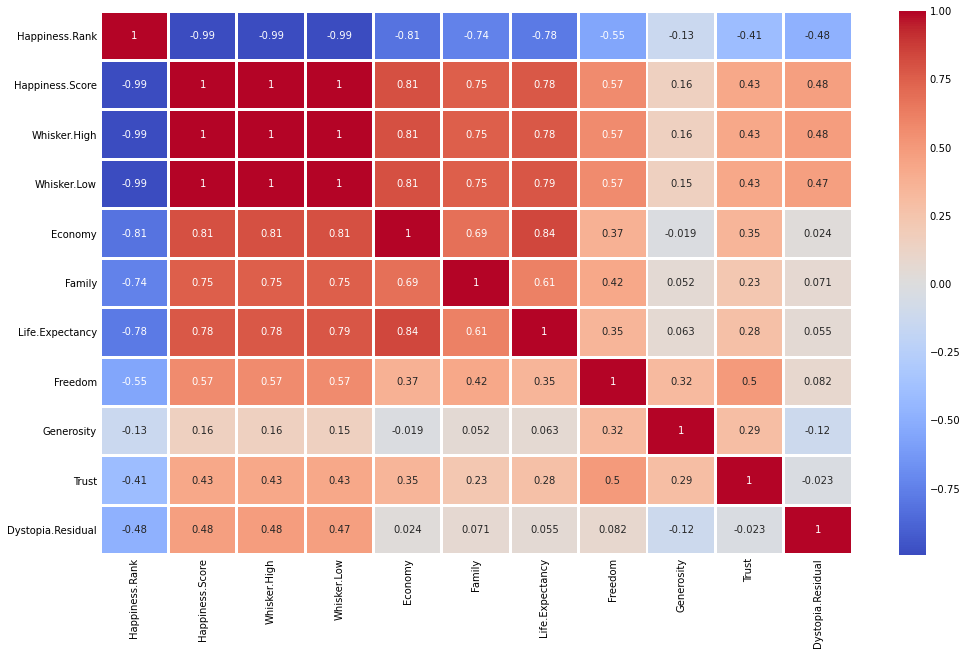

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.heatmap(df.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2)

Obviously, there is an inverse correlation between “Happiness Rank” and all the other numerical variables. In other words, the lower the happiness rank, the higher the happiness score, and the higher the other seven factors that contribute to happiness. So let’s remove the happiness rank, and see the correlation again.




### The correlation of the new dataset


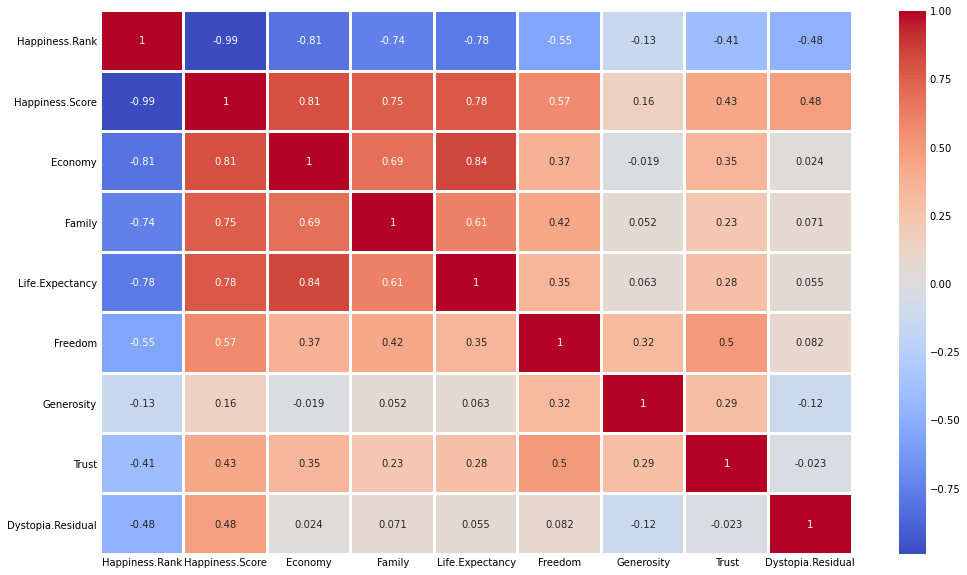

In [14]:
#The correlation of the new dataset
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.heatmap(df_new.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2)

According to the above correlation plot, Economy, life expectancy, and family play the most significant role in contributing to happiness. Trust and generosity have the lowest impact on the happiness score.

***Using the histogram helps us to make the decision making process a lot more easy to handle by viewing the data that was collected***

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000227B8F3C160>,
      dtype=object)

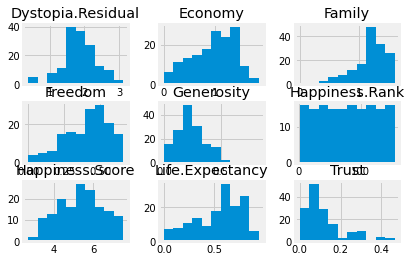

In [15]:
df_new.hist()

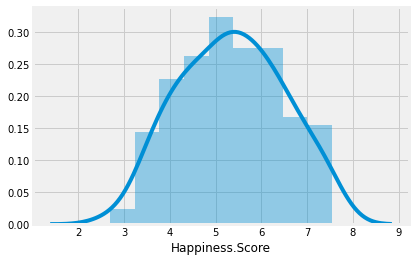

In [16]:
sns.distplot(df['Happiness.Score'])

In [17]:
df_new.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Economy', 'Family',
       'Life.Expectancy', 'Freedom', 'Generosity', 'Trust',
       'Dystopia.Residual'],
      dtype='object')

### Prediction- Setting up Linear Model to Predict Happiness

The following step allows to divide the data into attributes and labels. Attributes are the independent variables (X) while labels are dependent variables(y) whose values are to be predicted. In the new dataset, there are only have ten columns. We want to predict the happiness score depending upon the X recorded. Therefore, the attribute set consists of happiness. The score column, which is in the X variable, and the label will be the seven columns which is stored in the y variable.


In this section, we will implement several machine learning algorithms to predict happiness score. First, we should split our dataset into training and test set. The dependent variable is happiness score, and the independent variables are economy, family, life expectancy,freedom, generosity, trust, and dystopia residual.


In [18]:
#X = df['attend'].values.reshape(-1,1)
#y = df['temp'].values.reshape(-1,1)

X = df_new.drop(['Happiness.Score', 'Happiness.Rank', 'Country'], axis=1)
y = df_new['Happiness.Score']
X.head()

,Economy,Family,Life.Expectancy,Freedom,Generosity,Trust,Dystopia.Residual
0,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


Next, we split 80% of the data to the training set while 20% of the data to test set using below code.
The test_size variable is where we actually specify the proportion of the test set.

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

After splitting the data into training and testing sets, finally, the time is to train our algorithm. For that, we need to import LinearRegression class, instantiate it, and call the fit() method along with our training data.

Note that: lm stands for linear model and is called model or regressor

In [21]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train) #training the algorithm

#regressor = LinearRegression()  
#regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

The linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data. To see the value of the intercept and slope calculated by the linear regression algorithm for our dataset, execute the following code.

In [22]:
#To retrieve the intercept:
print(lm.intercept_)#For retrieving the slope:
print(lm.coef_)

0.00021834398875419936
[1.0000158  0.99988359 1.00010937 1.00007047 1.00010167 0.99977243
 0.99993477]


In [23]:
#print('Coefficients: \n', lm.coef_)
#lm.coef_

This means that for every one unit of change in X, the change in the y is about 0.00158% to 99.988359

### Prediction


Now that we have trained our algorithm, it’s time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the percentage score. To make predictions on the test data, execute the following script:

In [24]:
predictions = lm.predict( X_test)
predictions

array([5.26228745, 4.69487725, 4.49692683, 4.13868112, 6.42250499,
       5.27908846, 6.09756958, 5.17492782, 3.80821618, 4.028374  ,
       6.0836513 , 5.75835021, 6.89103942, 5.01067949, 5.6115555 ,
       6.40310136, 7.46917627, 7.52182076, 5.27284344, 5.23371025,
       3.79483561, 4.80526035, 4.64431666, 5.85034742, 4.82862178,
       6.42444498, 5.07384085, 5.96303476, 4.46005885, 5.15138853,
       4.29067616, 6.07147555, 5.49317722, 5.50004829, 5.83757062,
       5.00369496, 4.03215988, 6.57214101, 5.5693284 , 3.76657622,
       5.32432747, 5.22971336, 5.2274094 , 4.5497721 , 4.18047076,
       5.18248584, 6.00844881])

In [25]:
lm.score(X_test, y_test)

0.999999877525094

**Comparing the actual output values for X_test with the predicted values, execute the following script:**

In [26]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df.head()

,Actual,Predicted
80,5.262,5.262287
106,4.695,4.694877
116,4.497,4.496927
129,4.139,4.138681
32,6.422,6.422505


***Create the scatter plot ***

Text(0, 0.5, 'Predicted Y')

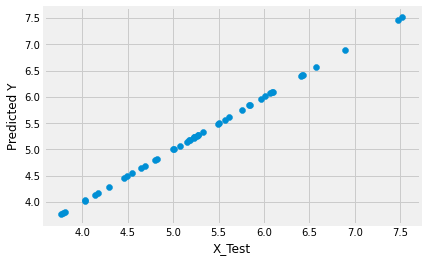

In [27]:
plt.scatter(y_test,predictions)
plt.xlabel('X_Test')
plt.ylabel('Predicted Y')

Let us figure out the RMSE.The root-mean-square deviation (RMSD) or root-mean-square error (RMSE) is a frequently used measure of the differences between values (sample or population values) predicted by a model or an estimator and the values observed. The RMSD represents the square root of the second sample moment of the differences between predicted values and observed values or the quadratic mean of these differences.

In [28]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.00028048667529037623
MSE: 1.0037684771818889e-07
RMSE: 0.00031682305427192147


As a result, RMSE is always non-negative, and a value of 0 (rarely achieved in practice) would indicate a perfect fit to the data. In general, a lower RMSD is better than a higher one. However, comparisons across different types of data would be invalid because the measure is dependent on the scale of the numbers used.

In [29]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Economy,1.000016
Family,0.999884
Life.Expectancy,1.000109
Freedom,1.000070
Generosity,1.000102
Trust,0.999772
Dystopia.Residual,0.999935


**The above result shows that there is a positive correlation. This indicates that when the predictor variable increases, the response variable will also increase.**

Ref:
In statistics, the sign of each coefficient indicates the direction of the relationship between a predictor variable and the response variable.
A positive sign indicates that as the predictor variable increases, the response variable also increases.
A negative sign indicates that as the predictor variable increases, the response variable decreases.
https://statisticsbyjim.com/glossary/regression-coefficient/

**In this below section we can visualize the comparison result as a bar graph using the following script :**

**Note: As the number of records is huge, for representation purpose I’m taking just 25 records.**

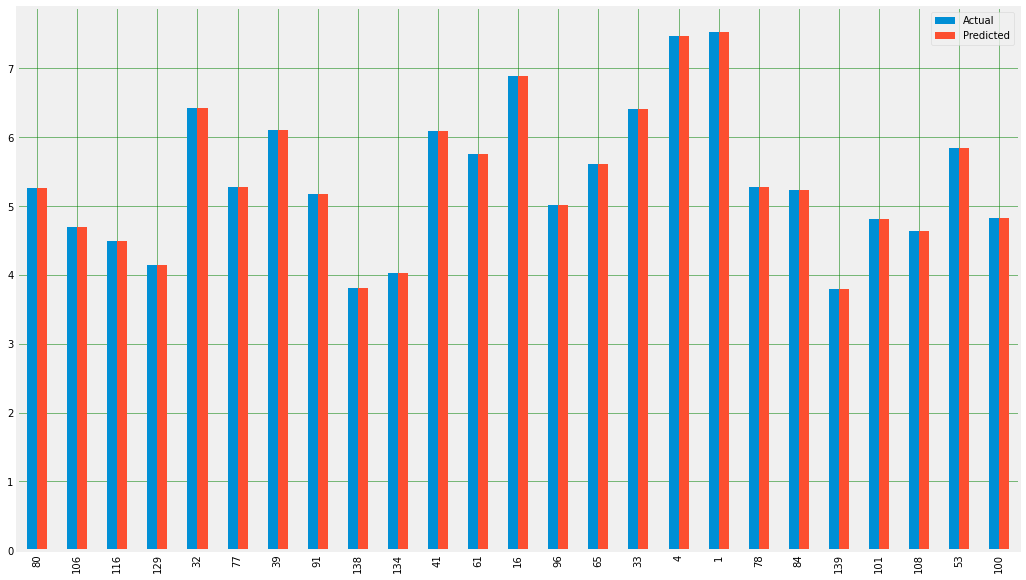

In [30]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Though our model is not very precise, the predicted percentages are equal to the actual ones.

### End Project1-DSC680

### To Continue